In [ ]:
# Shallow Neural Network

import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Create a callback function

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.26

    Args:
      epoch (integer) - index of epoch (required but unused in the function defintion below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.26):

      # Stop if threshold is met
      print("\nLoss is lower than 0.26 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4989 - accuracy: 0.8248
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3765 - accuracy: 0.8638
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390 - accuracy: 0.8761
Epoch 4/30
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3144 - accuracy: 0.8850
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2933 - accuracy: 0.8919
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2786 - accuracy: 0.8973
Epoch 7/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2684 - accuracy: 0.9002
Epoch 8/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.2560 - accuracy: 0.9047
Loss is lower than 0.26 so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2561 - accuracy: 0.9047

MODEL EVALUATION:
313/313 [=

In [ ]:
# CNN

# Define the model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/30
1875/1875 [==============================] - 47s 24ms/step - loss: 0.6556 - accuracy: 0.7585
Epoch 2/30
1875/1875 [==============================] - 46s 25ms/step - loss: 0.4558 - accuracy: 0.8318
Epoch 3/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3954 - accuracy: 0.8542
Epoch 4/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3592 - accuracy: 0.8670
Epoch 5/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3336 - accuracy: 0.8763
Epoch 6/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3136 - accuracy: 0.8838
Epoch 7/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2963 - accuracy: 0.8910
Epoch 8/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2847 - accuracy: 0.8949
Epoch 9/30
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2687 - accuracy: 0.9006
Epoch 10/30
1875/1875 [========================

In [ ]:
# EXERCISE
# ===========
# 32 convolutions
# MODEL EVALUATION:
# 313/313 [==============================] - 2s 6ms/step - loss: 0.2527 - accuracy: 0.9064

# 1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
# 16 = MODEL EVALUATION:
# 313/313 [==============================] - 1s 3ms/step - loss: 0.2838 - accuracy: 0.9009
# 64 = MODEL EVALUATION:
# 313/313 [==============================] - 2s 8ms/step - loss: 0.2589 - accuracy: 0.9068

# Not much change in changing convolutions

# 2. Remove the final Convolution. What impact will this have on accuracy or training time?
# MODEL EVALUATION:
# 313/313 [==============================] - 2s 5ms/step - loss: 0.2549 - accuracy: 0.9100
# The accuracy has slightly improved in less time

# 3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.
# More time, but not much impact because I think the input data is not that complex that we need more convolutions to find more distinct features
# MODEL EVALUATION:
# 313/313 [==============================] - 1s 4ms/step - loss: 0.3587 - accuracy: 0.8708
# accuracy has decreased

# 4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

# 5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.
# Implemented with loss threshold less than 26%


In [ ]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 15ms/step


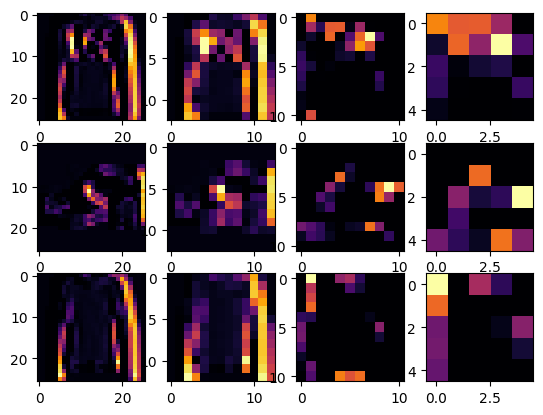

In [ ]:
# Visualizing convolutions and pooling

import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=1
SECOND_IMAGE=23
THIRD_IMAGE=99
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)